# Regressão logística_res

In [2]:
import pandas as pd
import numpy as np
import math

In [26]:
df=pd.read_csv('c:\\dados\\banknotes.txt',names=['f1','f2','f3','f4','fraude'])

In [34]:
df.head()

,f1,f2,f3,f4,fraude
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
f1        1372 non-null float64
f2        1372 non-null float64
f3        1372 non-null float64
f4        1372 non-null float64
fraude    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


A amostra é balanceada em positivos e negativos? Dica: use .value_counts() na série do target

In [28]:
df['fraude'].value_counts()

0    762
1    610
Name: fraude, dtype: int64

In [31]:
def sig(x):
    return 1/(1+math.exp(-x)) 

In [30]:
def sig_vet(v):
    for i in range(len(v)):
        v[i]=sig(v[i])
    return v

In [10]:
def grad(X,theta,y):
    return (1/len(y))*np.dot(X.T,sig_vet(np.dot(X,theta))-y)

In [22]:
def custo(X,theta,y):
    parte1=-np.dot(y.T,np.log(sig_vet(np.dot(X,theta))))
    parte2=-np.dot((1-y).T,np.log(1-sig_vet(np.dot(X,theta))))
    return (1/len(y))*(parte1+parte2)

In [35]:
X=np.ones((len(df),5))
X[:,1]=df['f1']
X[:,2]=df['f2']
X[:,3]=df['f3']
X[:,4]=df['f4']
y=np.array(df['fraude'])

In [36]:
#aqui fazemos o gradient descent
lc=[]
theta=np.array([0.5,0.5,0.5,0.5,0.5])
lc.append(custo(X,theta,y))
for i in range(20000):
    g=grad(X,theta,y)
    theta=theta-0.01*g
    lc.append(custo(X,theta,y))
theta

array([ 2.7502927 , -2.59340554, -1.50390633, -1.78678013, -0.15266665])

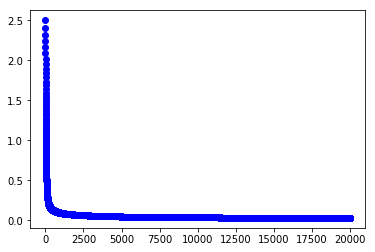

In [37]:
import matplotlib.pyplot as plt
plt.plot(lc,'bo')
plt.show()

Calcule a acurácia na amostra de treinamento

In [41]:
ye=sig_vet(np.dot(X,theta))
for i in range(len(ye)):
    if ye[i]>0.5:ye[i]=1
    else: ye[i]=0

certos=0
for i in range(len(ye)):
    if ye[i]==y[i]:certos+=1
certos/len(ye)

0.9905247813411079